In [1]:
import random
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [3]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

In [4]:
import base64
import json
import subprocess

In [5]:
def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

In [6]:
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    
    from sklearn.tree import DecisionTreeClassifier
    
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)

    return clf

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xt8lNWd+PHPEEYCcpFL0yUJlxDAcCdoiiCCYA3iBYra\nkq3gyqJ0q1TdH/ur2rU1VH99LexS1wp2Y7uLixSw21ZQKZdXIYhAIKIgFouYIEmBKrdVLCCQzPz+\nmMxkMpnLMzPP5Zxnvu/Xi5czkyfznJwZz/c55/meczx+v9+PEEIIoZk2ThdACCGESIUEMCGEEFqS\nACaEEEJLEsCEEEJoSQKYEEIILUkAE0IIoSUJYEIIIbQkAUwIIYSWJIAJIYTQkgQwIYQQWpIAJoQQ\nQksSwIQQQmhJApgQQggtSQATQgihJQlgQgghtCQBTAghhJYkgAkhhNCSBDAhhBBakgAmhBBCSxLA\nhBBCaEkCmBBCCC1JABNCCKElCWBCCCG0JAFMCCGEliSACSGE0JIEMCGEEFqSACaEEEJLEsCEEEJo\nqa3TBbCKx+NxughCCKElv9/vdBEMcW0AAyh3ugAKqQQmOl0IRUhdtGR3fRQCMwBv03Mf8AmwBahN\n4n1mNr1XuFpgRZrli1cfVp3TaoXAnUCHiNePA7+IeK3cjgKZRIYQhRC2qgVeIdB4+gg0QrkEglpk\ncBDmqAV+B1wOe+0ygYsGnbm6ByaSUwiMaXpcRXJXw5lI6it1tQTqLvwK2tv0mtF6rAJ609yTu9z0\nmpWcOKdZghcObvrOSgDLEH0T/DxyWKc3gS+77l/waPqa8B5uqq++ThcgRVY1yH0dOKddatGrvIlI\nAMsQBQl+PobmxhiSvxrWSaK6MMJN9WVGfaQiXm/GaO823QY52nkS1YfbgoDOJIAJIRwRqzdjdu/2\n+XbtOH3xYholdafu7drxPc

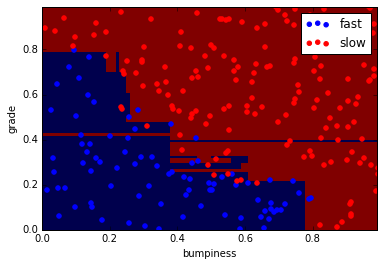

In [7]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]



clf = classify(features_train, labels_train)



    ### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())

In [23]:
def TreeAccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    

    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)

    from sklearn.metrics import accuracy_score
    print accuracy_score(pred, labels_test)
    accuracy = accuracy_score(pred, labels_test)
    return accuracy

In [24]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

def submitAccuracy():
    accuracy = TreeAccuracy(features_train, labels_train, features_test, labels_test)
    return accuracy

In [25]:
submitAccuracy()

0.912


0.91200000000000003

In [27]:



features_train, labels_train, features_test, labels_test = makeTerrainData()



########################## DECISION TREE #################################


### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively

clf_2 = DecisionTreeClassifier(min_samples_split=2)
clf_2.fit(features_train,labels_train)
pred_2 = clf_2.predict(features_test)
acc_min_samples_split_2 = accuracy_score(labels_test, pred_2)


clf_50 = DecisionTreeClassifier(min_samples_split=50)
clf_50.fit(features_train,labels_train)
pred_50 = clf_50.predict(features_test)
acc_min_samples_split_50 = accuracy_score(labels_test, pred_50)


def submitAccuracies():
  return {"acc_min_samples_split_2":round(acc_min_samples_split_2,3),
          "acc_min_samples_split_50":round(acc_min_samples_split_50,3)}

In [22]:
submitAccuracies()

{'acc_min_samples_split_2': 0.908, 'acc_min_samples_split_50': 0.912}